In [1]:
# -- IMPORTS -- #
import math
import scipy
import numpy as np
from skimage import util
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
# -- TRAIN AND TEST DATA PREPARATION -- #
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_noisy = np.empty((len(x_test),28,28),dtype="float64")

std = 0.005
for i in range(len(x_test)):
    x_test_noisy[i] = util.random_noise(x_test[i],mode="gaussian",var=std**2)

38.034187905770814


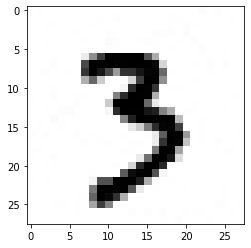

In [3]:
# -- OUTPUT SNR AND SAMPLE NOISY IMAGE -- #
p_signal = np.mean(x_test[30])
p_noise = std
snr = 10 * math.log(p_signal/p_noise,10)
print(snr)

plt.imshow(x_test_noisy[30],cmap=plt.cm.binary)
plt.show()

In [4]:
# -- CONVERTING DATA FOR INPUT INTO NEURAL NETWORK -- #
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000,28*28))
x_test_noisy = x_test_noisy.reshape((10000,28*28))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# -- DIMENSIONALITY REDUCTION -- #
import dim_reduction
x_train, x_test_noisy = dim_reduction.apply(30, x_train, x_test_noisy, "asdf")

In [ ]:
# -- NEURAL NETWORK -- #
import neural_network
history = neural_network.fit(30, 30, x_train, y_train, x_test_noisy, y_test)

In [ ]:
# -- OUTPUT PLOTS -- #
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy (Gaussain)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["a"],loc="lower right")
plt.show()